In [1]:
# TODO add comments
from utils import data_analysis, data_analysis_fixed_len, comparative_text_len

# Analysis with unconstrained length

Dataset : amazon


,Text,Cat1,Cat2,Cat3
0,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


Training data 
Contains 40000 examples
Amount of appearances for Cat1: 
 * unique values 6  
 * Minimal: grocery gourmet food appears 3617 times  
 * Maximal: toys games appears 10266 times  
 * in average 6666.67 times.  
 
Amount of appearances for Cat2: 
 * unique values 64  
 * Minimal: small animals appears 29 times  
 * Maximal: personal care appears 2852 times  
 * in average 625.00 times.  
 
Amount of appearances for Cat3: 
 * unique values 464  
 * Minimal: aprons smocks appears 1 times  
 * Maximal: unknown appears 2262 times  
 * in average 86.21 times.  
 


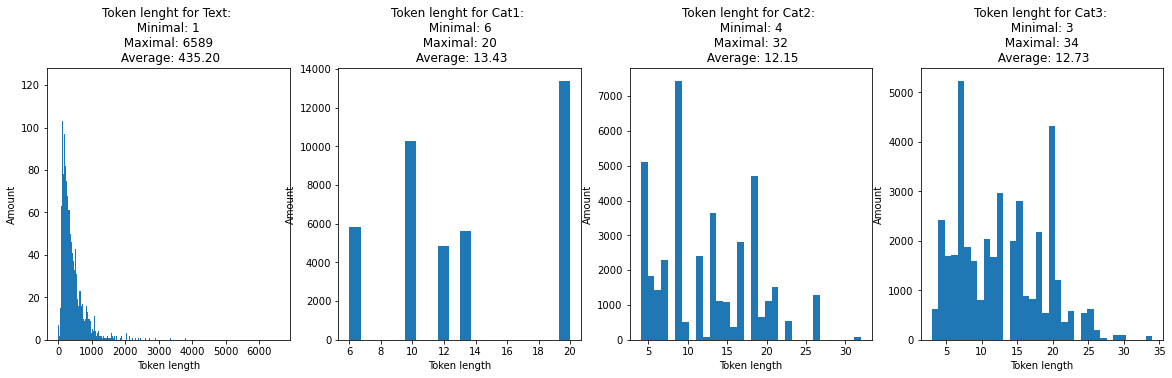

Test data 
Contains 10000 examples
Amount of appearances for Cat1: 
 * unique values 6  
 * Minimal: baby products appears 698 times  
 * Maximal: health personal care appears 2992 times  
 * in average 1666.67 times.  
 
Amount of appearances for Cat2: 
 * unique values 64  
 * Minimal: baby food appears 2 times  
 * Maximal: nutrition wellness appears 904 times  
 * in average 156.25 times.  
 
Amount of appearances for Cat3: 
 * unique values 377  
 * Minimal: aquarium hoods appears 1 times  
 * Maximal: vitamins supplements appears 665 times  
 * in average 26.53 times.  
 


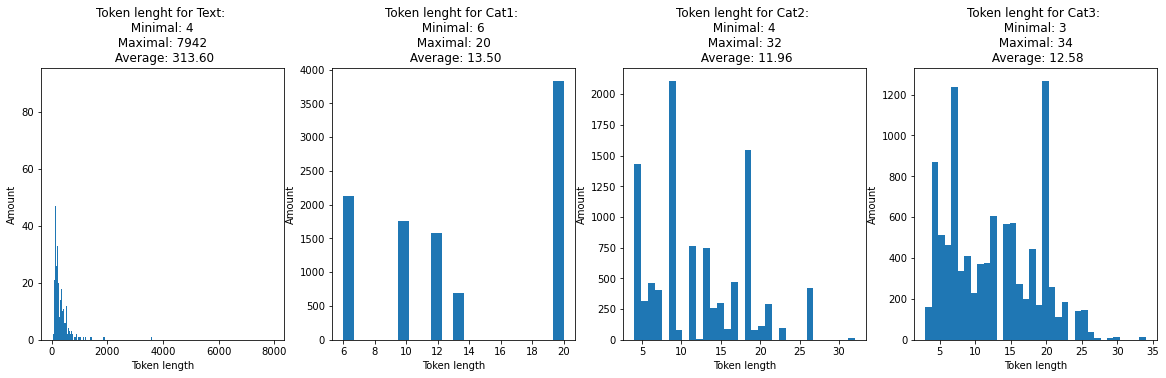

In [2]:
data_analysis("amazon")

Dataset : dbpedia


,Text,Cat1,Cat2,Cat3
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding


Training data 
Contains 240942 examples
Amount of appearances for Cat1: 
 * unique values 9  
 * Minimal: Device appears 248 times  
 * Maximal: Agent appears 124798 times  
 * in average 26771.33 times.  
 
Amount of appearances for Cat2: 
 * unique values 70  
 * Minimal: Database appears 129 times  
 * Maximal: Athlete appears 31111 times  
 * in average 3442.03 times.  
 
Amount of appearances for Cat3: 
 * unique values 219  
 * Minimal: BiologicalDatabase appears 129 times  
 * Maximal: AcademicJournal appears 1924 times  
 * in average 1100.19 times.  
 


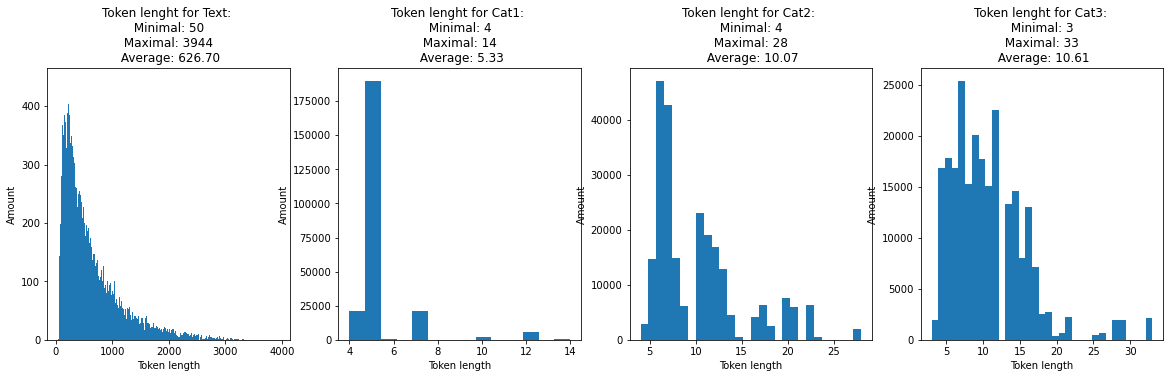

Test data 
Contains 60794 examples
Amount of appearances for Cat1: 
 * unique values 9  
 * Minimal: Device appears 62 times  
 * Maximal: Agent appears 31495 times  
 * in average 6754.89 times.  
 
Amount of appearances for Cat2: 
 * unique values 70  
 * Minimal: Database appears 33 times  
 * Maximal: Athlete appears 7855 times  
 * in average 868.49 times.  
 
Amount of appearances for Cat3: 
 * unique values 219  
 * Minimal: BiologicalDatabase appears 33 times  
 * Maximal: AcademicJournal appears 485 times  
 * in average 277.60 times.  
 


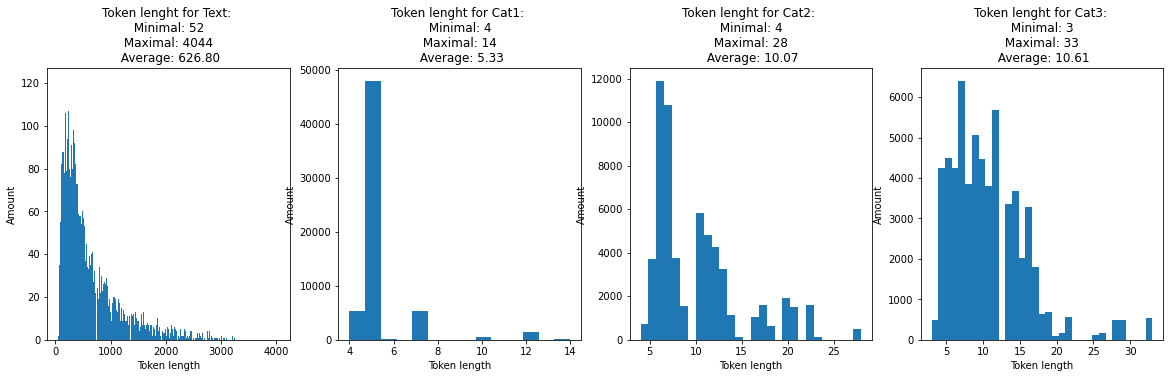

In [3]:
data_analysis("dbpedia")

# Analysis when constrained to max length 100

Dataset : amazon


,Text,Cat1,Cat2,Cat3
0,The description and photo on this product need...,grocery gourmet food,meat poultry,jerky
1,This was a great book!!!! It is well thought t...,toys games,games,unknown
2,"I am a first year teacher, teaching 5th grade....",toys games,games,unknown
3,I got the book at my bookfair at school lookin...,toys games,games,unknown
4,Hi! I'm Martine Redman and I created this puzz...,toys games,puzzles,jigsaw puzzles


Training data 
Contains 40000 examples


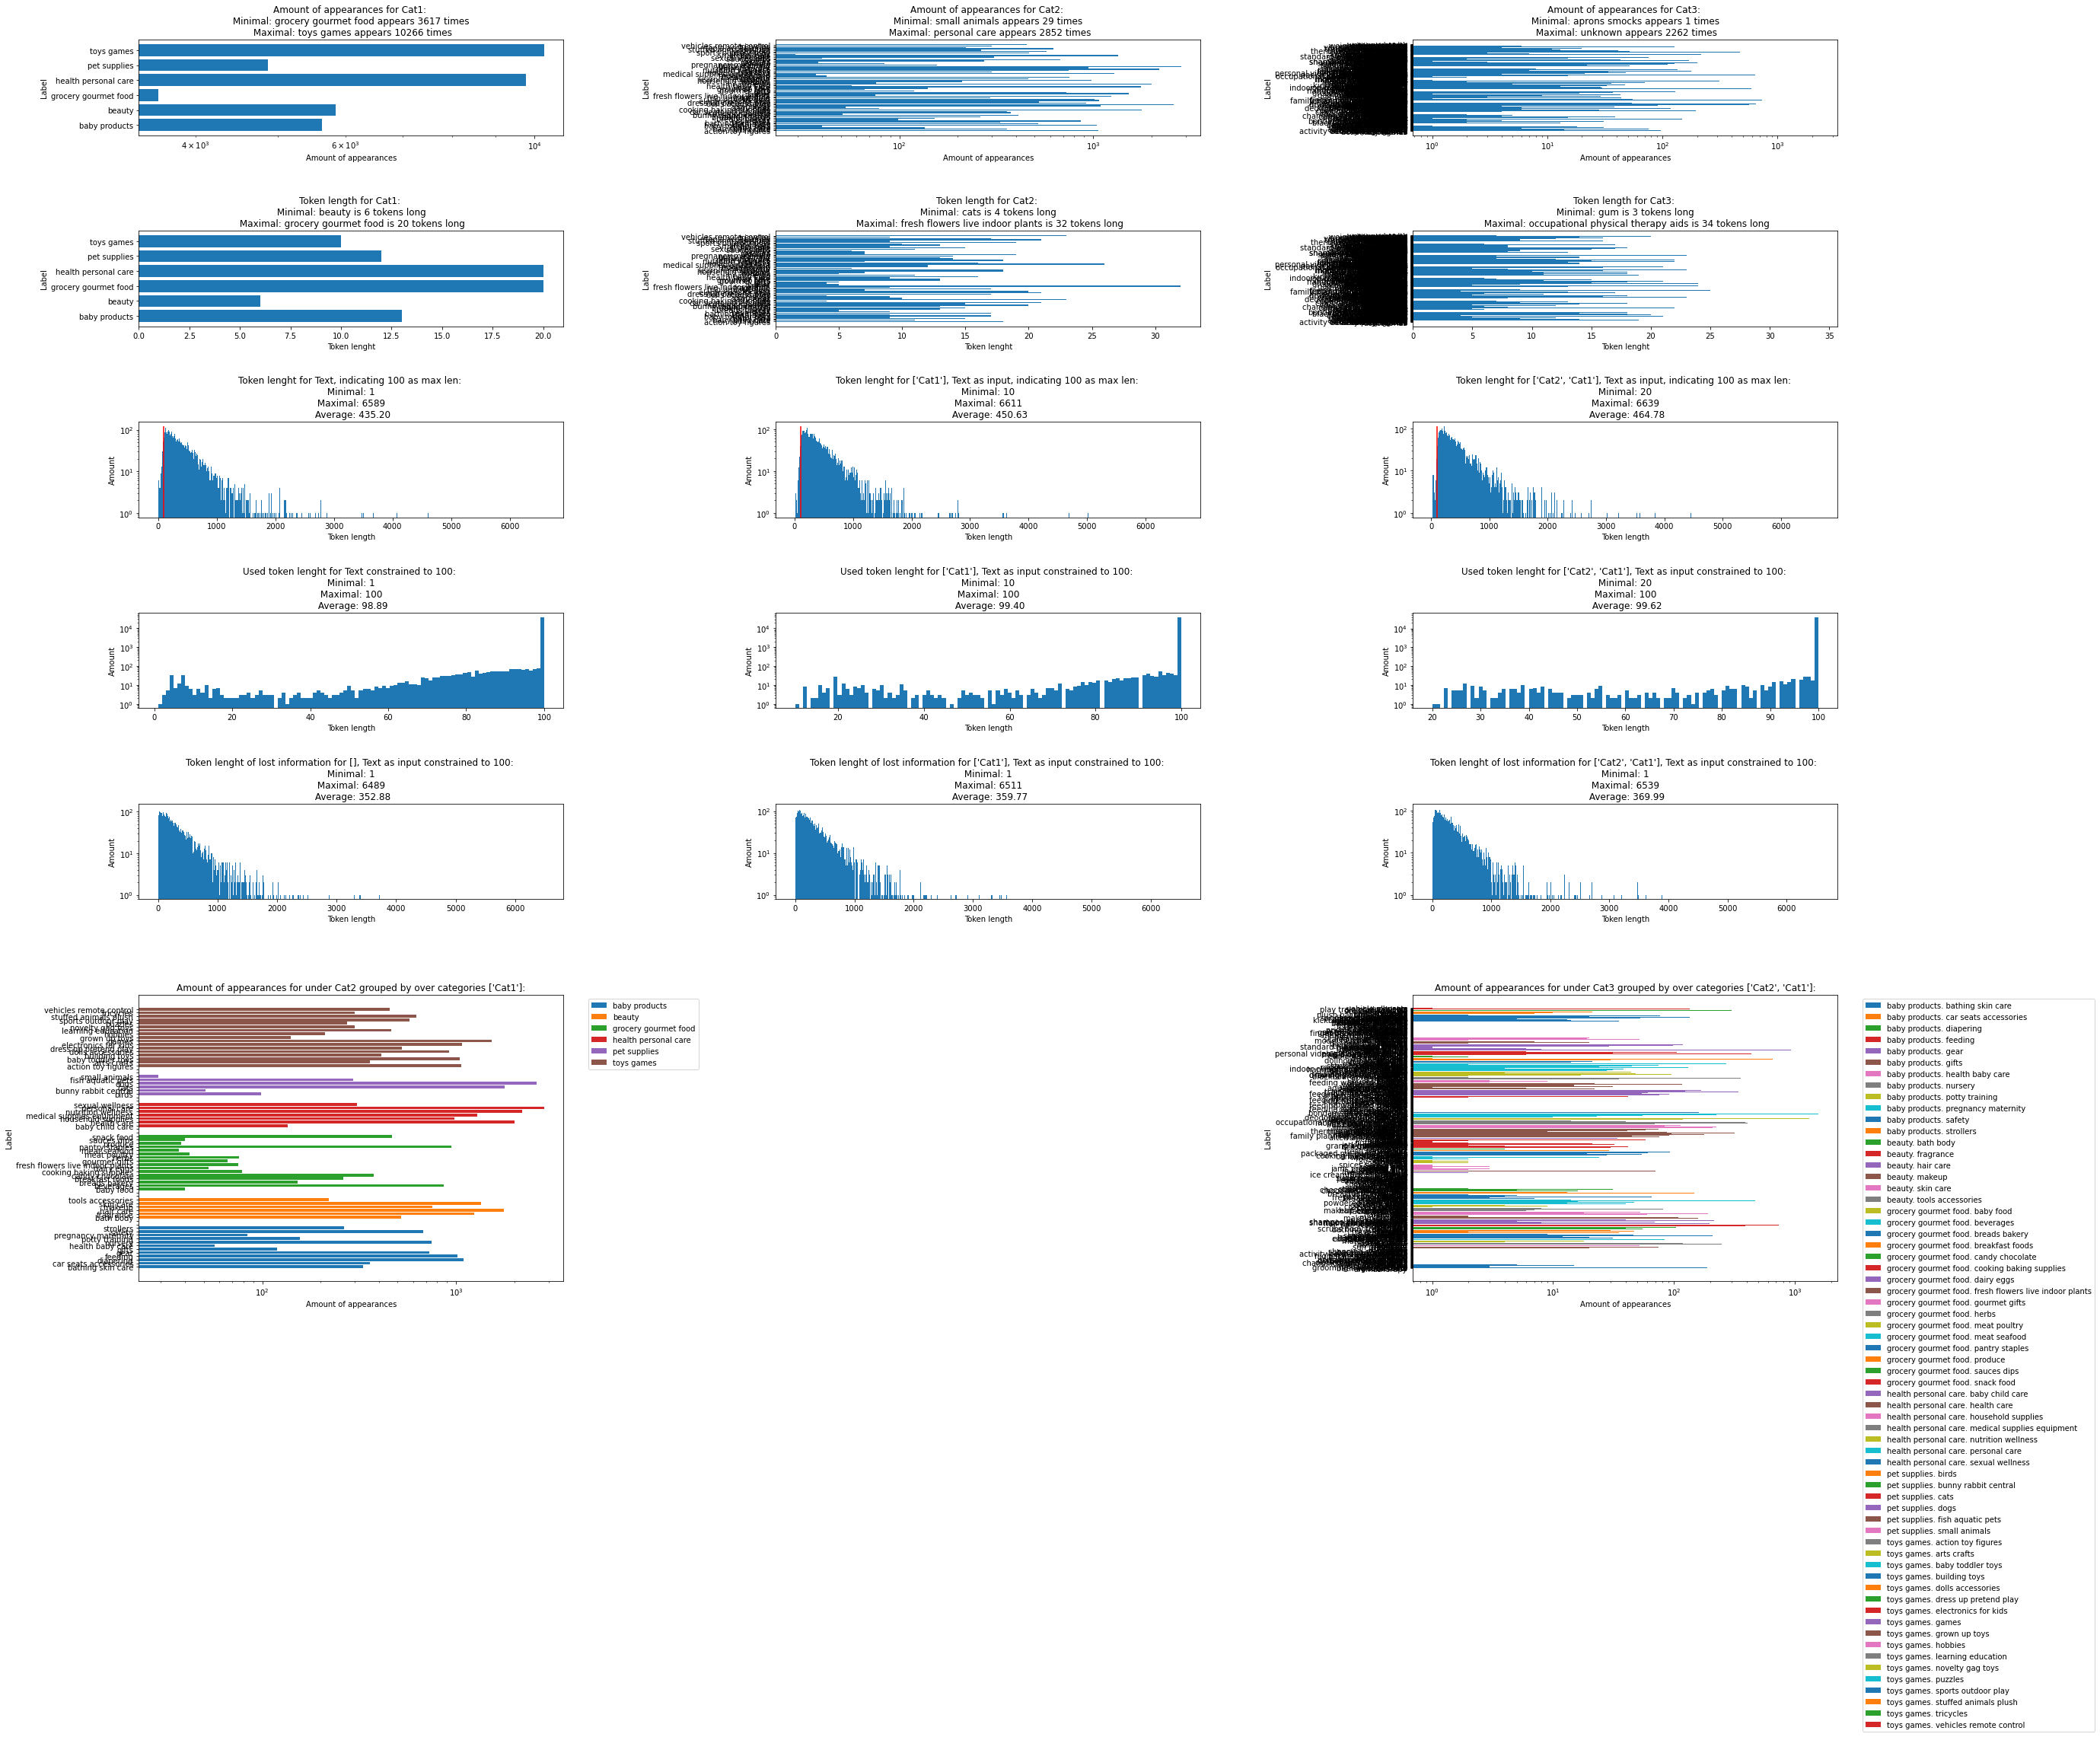

Test data 
Contains 10000 examples


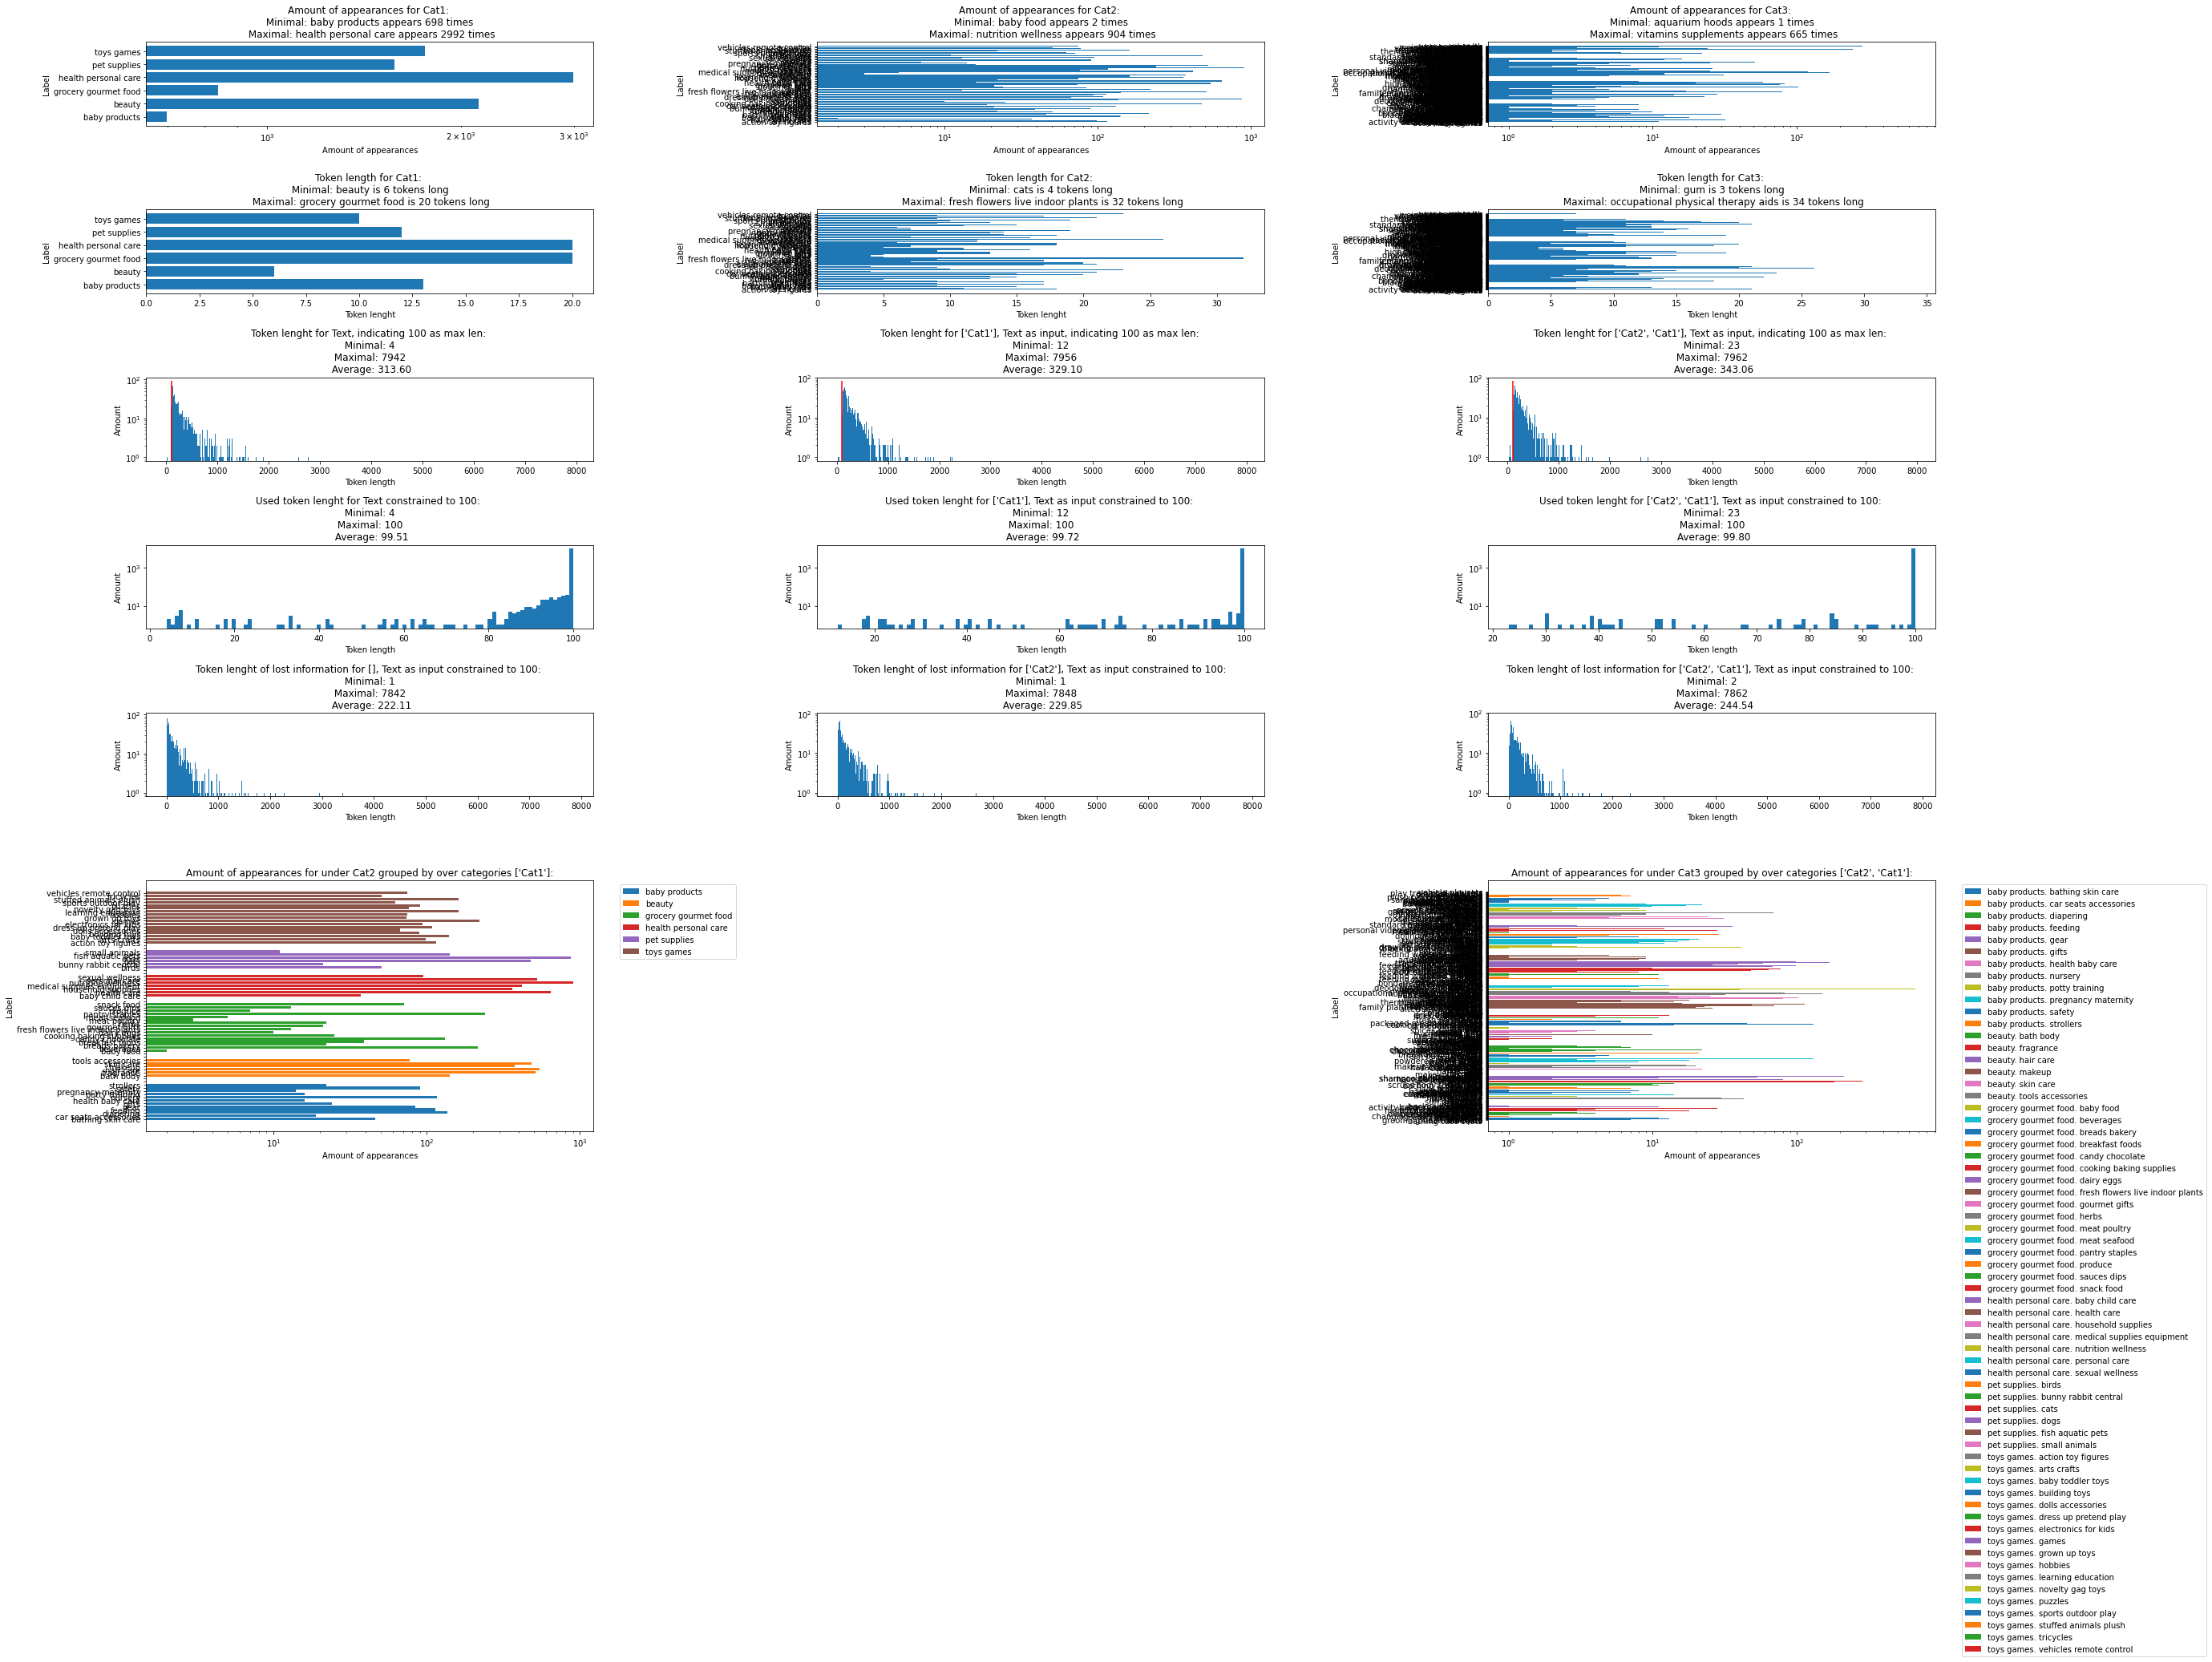

In [4]:
data_analysis_fixed_len("amazon")

Dataset : dbpedia


,Text,Cat1,Cat2,Cat3
0,"William Alexander Massey (October 7, 1856 – Ma...",Agent,Politician,Senator
1,Lions is the sixth studio album by American ro...,Work,MusicalWork,Album
2,"Pirqa (Aymara and Quechua for wall, hispaniciz...",Place,NaturalPlace,Mountain
3,Cancer Prevention Research is a biweekly peer-...,Work,PeriodicalLiterature,AcademicJournal
4,The Princeton University Chapel is located on ...,Place,Building,HistoricBuilding


Training data 
Contains 240942 examples


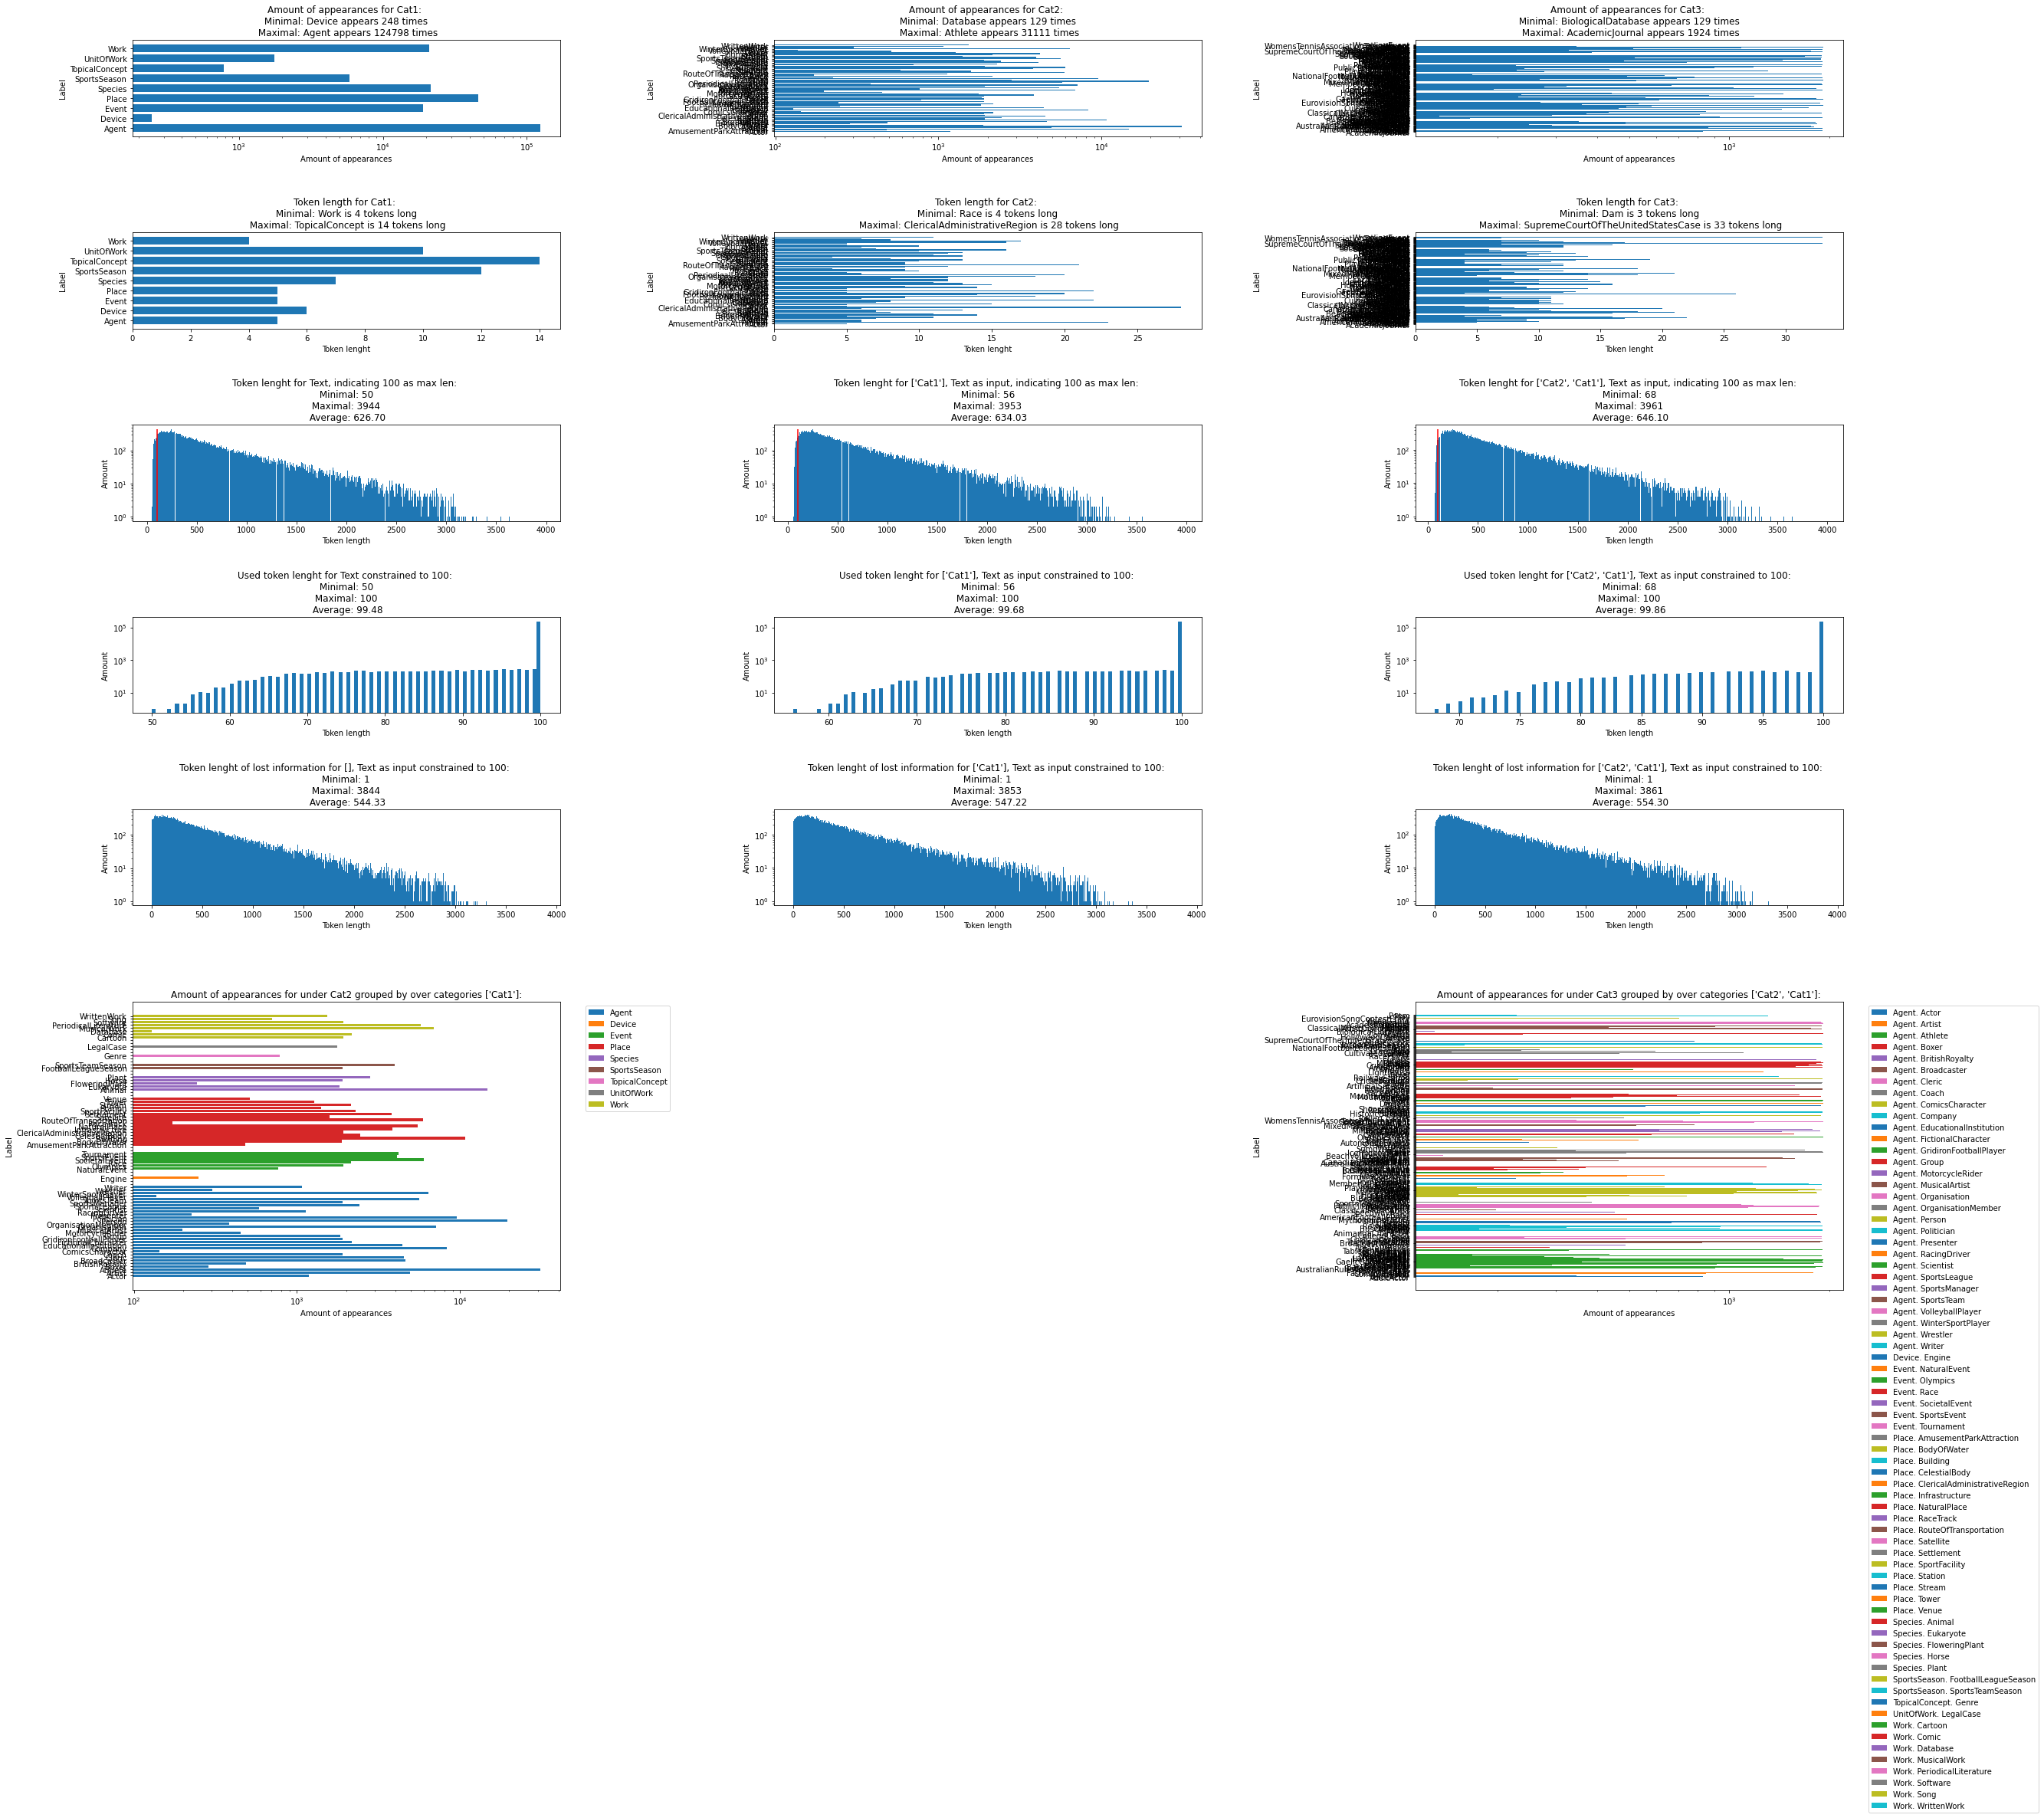

Test data 
Contains 60794 examples


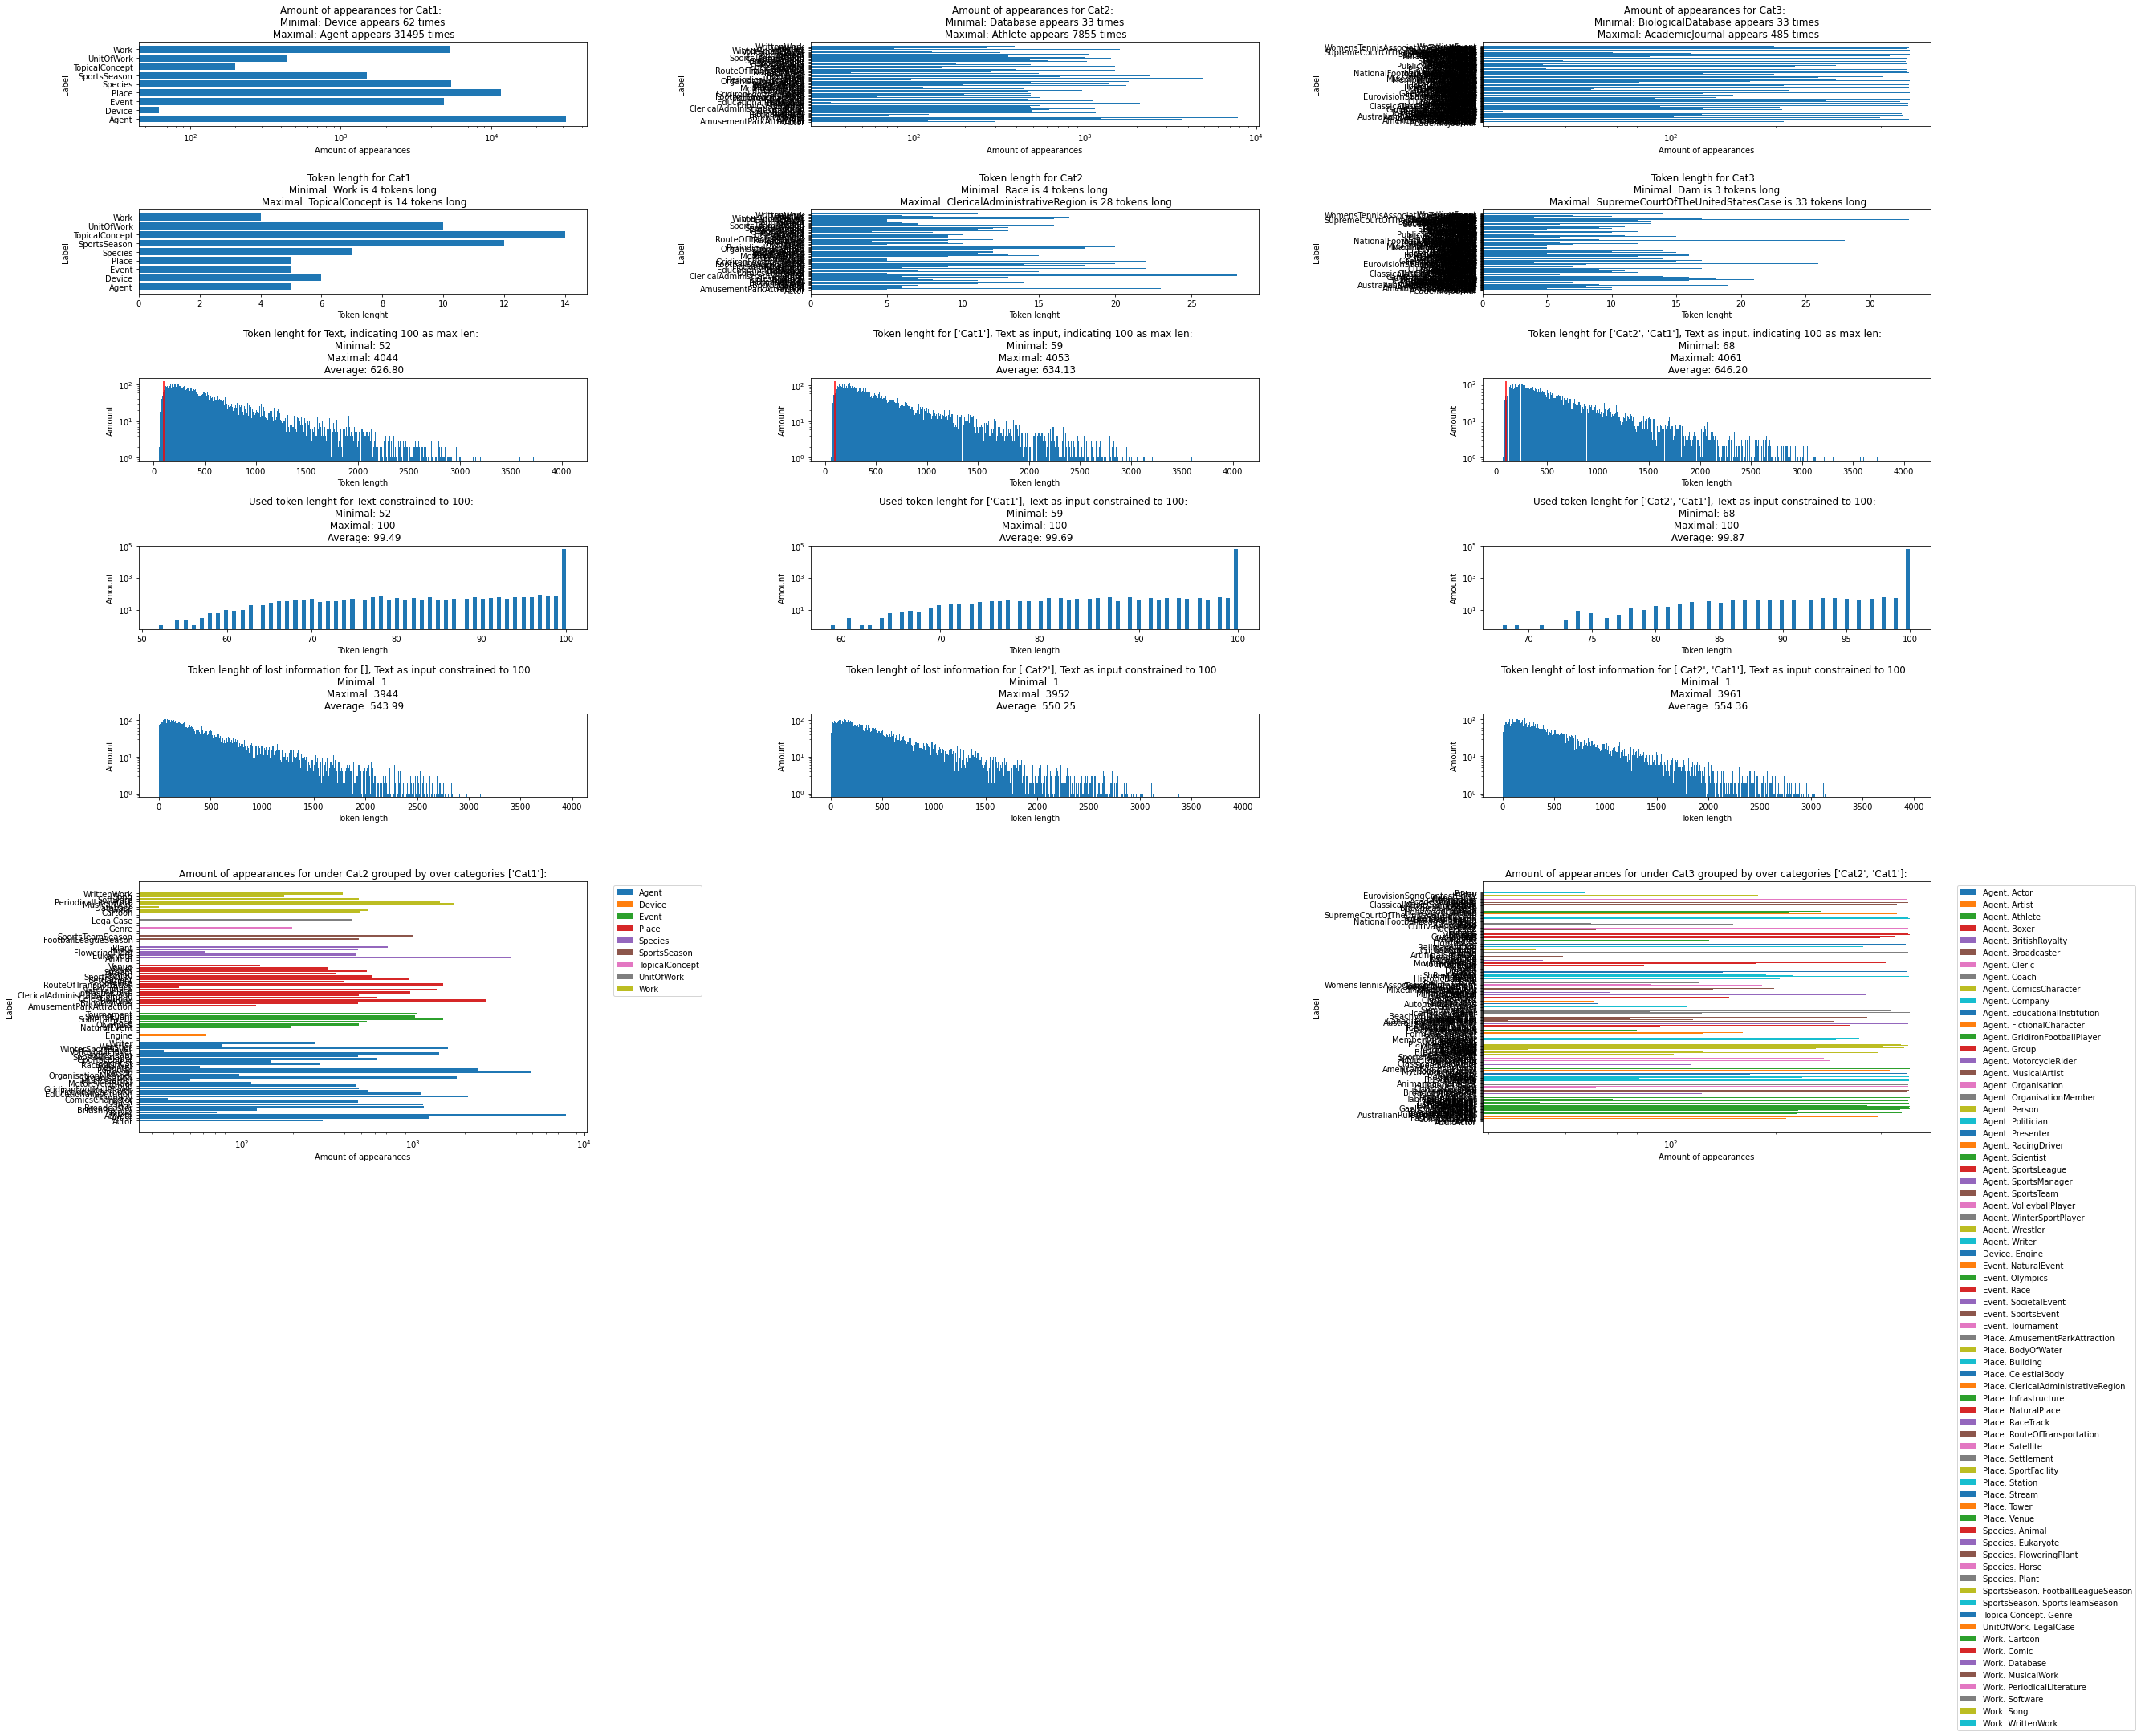

In [5]:
data_analysis_fixed_len("dbpedia")

# Comparative text lenght

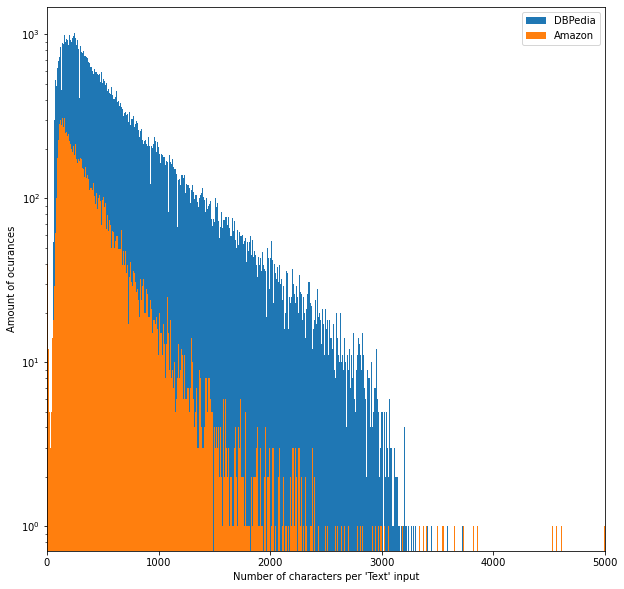

In [6]:
comparative_text_len()